<a href="https://colab.research.google.com/github/pragneshrana/LearnDataScience/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: 

1.   https://arxiv.org/pdf/1812.08434.pdf
2.   https://arxiv.org/abs/2011.02260


Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs. Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs.

Application:

* Image classification by word embedding using ZSL

  Zero shot learning (ZSL) refers to trying to learn to recognise classes that the model has not encountered in its training.
* Text : text classification, sequence labelling, machine translation, relation and event extraction
* Combinatorial Optimization: minimum vertex cover problem, maximum cut, the travelling salesman problem, minimum spanning tree, etc.
*   Recommender Systems
*   Social influence prediction
* Medica/Pharmacy 
*   https://arxiv.org/pdf/1812.08434.pdf


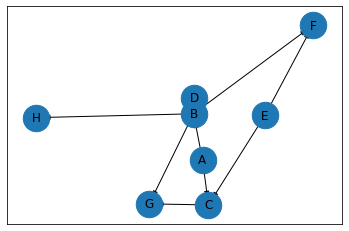

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

#### The adjacency matrix from the above graph can be written as,
$
\begin{matrix}
&A&B & C & D & E & F & G & H\\
\end{matrix} \\
\begin{matrix}
A\\
B\\
C\\
D\\
E\\
F\\
G\\
H\\ 
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$

The other two type matrix tcan be:
- Incident Matrix (nodes X edges)
- Degree matrix (nodes X nodes) [number of edges attached to each node--2 for self connection]

- Laplacian matrix (graph laplacian)
  -  $L = D - A$ 
  - Laplace-Beltrami opeartor
  - measure of smothness of a vetrex or How quickly it chnages between the adjacent vertex.

### Example of application


*   Node level prediction -- Data about unlabelled nodel. (Will he/she smoke?) [predicting the identity or role of each node within a graph.] 
*   Edge level (link) prediction -- What will be next netflix video? [ given nodes that represent the objects in the image, we wish to predict which of these nodes share an edge or what the value of that edge is. ]
*  Graph level prediction --- Is this module suitable for this customer [goal is to predict the property of an entire graph]



## Problems with graph

Goal is to feed graph in neural network.  --> Geometric deep learning

neutral-network-diagram.svg

- Input to the neural-net is fixed but graphs size can arbitarily grow.

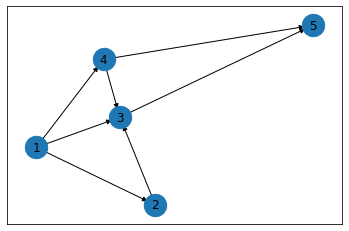

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('1', '2'), ('1', '4'), ('1', '3'), ('4', '3'), ('2', '3'), ('3', '5'), ('4', '5')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

 - if 
  -  not innvariant to node ordering 
  - graphs of same size 

  $
\begin{matrix}
&1&2 & 3 & 4 & 5 & feat...\\
\end{matrix} \\
\begin{matrix}
1\\
2\\
3\\
4\\
5
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 1 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$

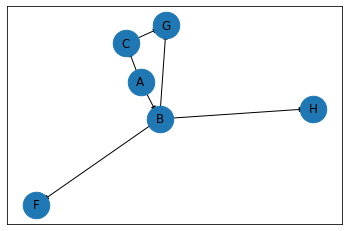

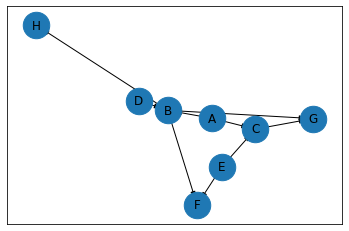

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

## Iso-morphism
- The rotation of graph will change the orientation and order of rows in input matrix. 
We can't directly feed matrix to the neural-net


Also, Adjacency matix include node information but nothing about edges, how far or close they are!

Representation Learning -- Represent graph data such that each node know about all other connected nodes.

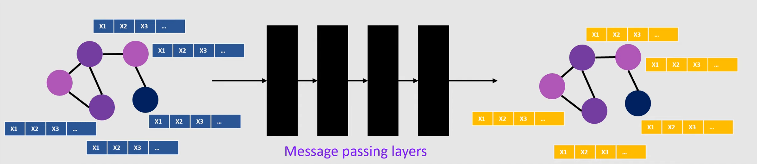

3 Main Types of Graph Neural Networks (GNN)

    Recurrent graph neural network.
    Spatial convolutional network.
    Spectral convolutional network.

The task of all GNN is to determine the node embedding for each node by looking at the information on its neighboring nodes.

## Spatial Convoltion network

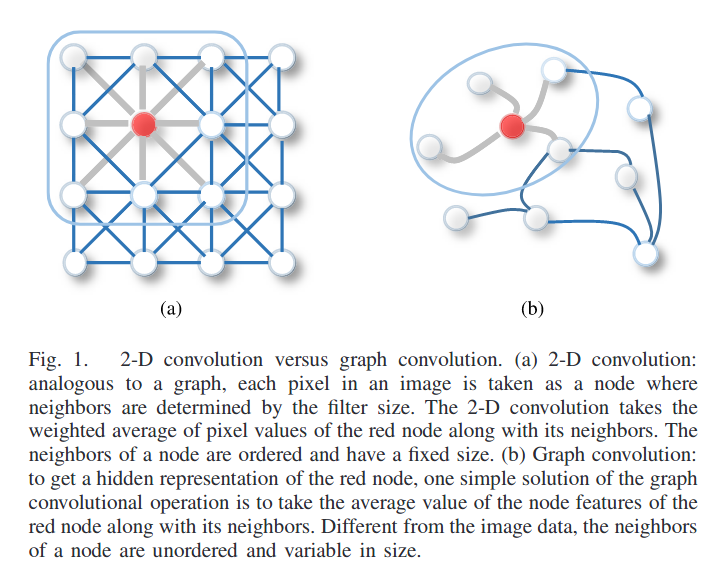

Ref: Wu, Z., Pan, S., Chen, F., Long, G., Zhang, C. and Philip, S.Y., 2020. A comprehensive survey on graph neural networks. IEEE transactions on neural networks and learning systems, 32(1), pp.4-24.

Useful problem that can be formulated from graph:


# Graph Convolution (Spectral convolution)
A : Adjacency matrix \\
$\hat{A}$ : A + I (added I to include self loops) \\
$\hat{D}$ : $\hat{A}^{-1}$ (normalizing) \\
X : feature vector \\
W : weight vector (feature reduction) \\

Input to the hidden layer applying relu : \\
= relu($\hat{A}^{-1}\cdot \hat{A} \cdot  X \cdot W$)


### Nodel level prediction

In [53]:
from networkx import karate_club_graph, to_numpy_matrix
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [54]:
zkc.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

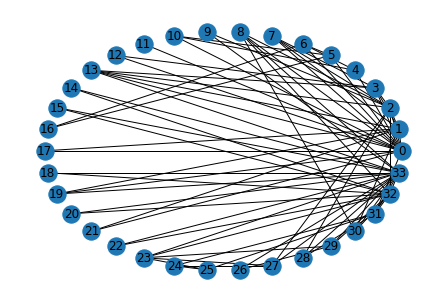

In [55]:
nx.draw_circular(zkc, with_labels=True)
plt.show()

In [56]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [57]:
def relu(x):
    return np.maximum(0, x)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [58]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

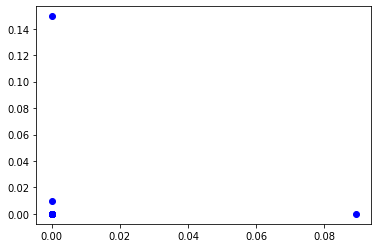

In [59]:
for i in range(len(feature_representations)):
  plt.scatter(feature_representations[i][0],feature_representations[i][1],color='b')
plt.show()

Apart from storing adjacency matrix the more efficient way is to store nodes, edges and adjacency list seperately.

Edge and adjacency list have direct mapping.



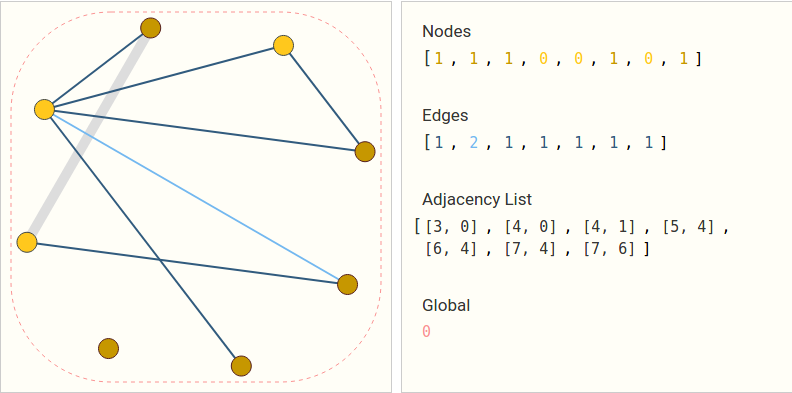

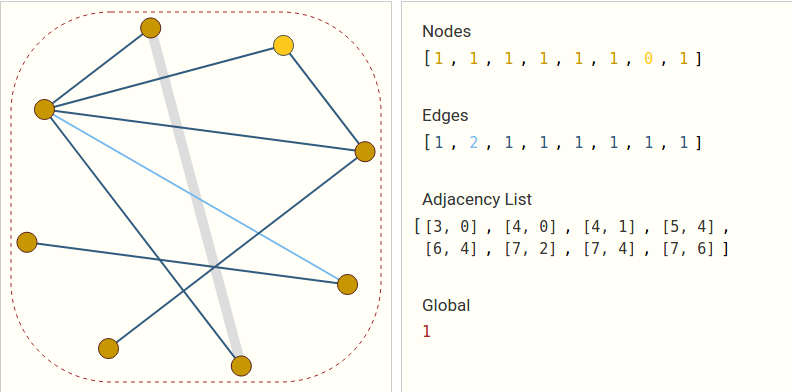

## Recurrent Graph Neural Network
RecGNN is built with Banach fixed-point theorem. It uses contraction mapping. If we apply mapping T on x K times then $x^k$ ~ $x^{k-1}$

The parameterized function of RecGNN is defines as, \\
$x_n = \mathcal{f}_w (l_n,l_{co[n]},x_{ne[n]},l_{ne[n]})$

# How to represent graph in efficient matrix format?
- Node Embedding  : Map nodes (of P dimension) to d dimension embedings such that similar nodes in the graph are embedded
- d<<P
- neighbourhood closness remain consistent


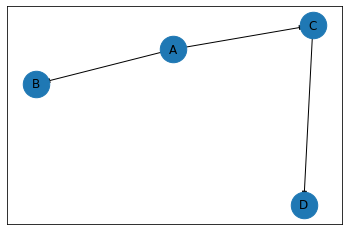

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'),  ('C', 'D')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

For, node-a feature vectoer is $x^a$ and for node-b feature vector is $x^b$. \\
so, GOAL: similarity(a,b) = ${z^{a}}^T z^b$ ~ ${x^{a}}^T x^b$ \\
where, Encoder function: $\mathcal{f}({x:z})$

To peform this task, 
The given can be performed using two step computational graph.

Figure(1)

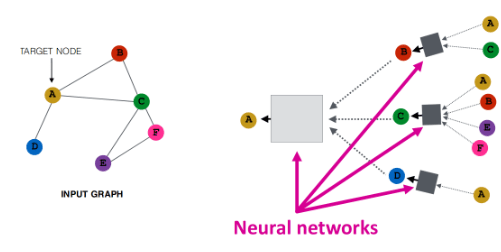

### Above process for each computational node:

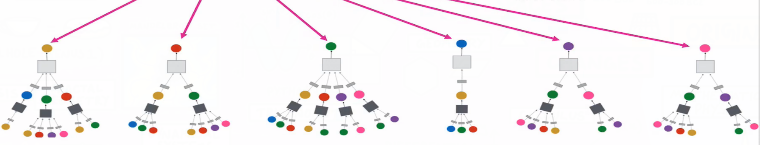

In figure(1), let' say input $x^A$ is $MX1$ and similar for all other inut. \\
The output of the computaional graph is $Z_A$ which is $NX1$ where, $N<<M$.

Also, the base layer of graph is assigned as $K=0$ and layer as we go up layer increase. \\
Figure(1) has two layers k=0 (base layer) and k=1. \\
where, k=$1,2,...K-1$ indiates position in computaitonal graph.

Formulas: \\
$h_v^{0} = x_v$ (activation at the zeroth layer is feature vector itself)  

$h_v^{k} = \sigma \bigg(\underbrace{w_k \sum_{u \in N(v)} \bigg[ \frac{h_u^{k-1}}{N(v)}  \bigg]}_\text{Averaging of the neighbour}  + \underbrace{B_k h_v^{k-1}}_\text{self loop activation bias}  \bigg)$ \\
(Above is non-linear recursive eqn ) where, $N(v)$ is total number of layers \\

$Z^A = Z^M = h_v^K$

## Matrix Notation

- Graph $G(V,E)$
- Input feature matrix $(NXM) = X$ \\
    where, N is number of node, M is feature vector
- Adjacency Matrix $(NXN) = A$
- Generalized neural network is represented as, \\
    $H^{l+1} = f(H^l,A)$ with $H^0 = X$  and $H^L = Z$ \\
    where,  L = number of layers


Simple layer wise propogation rule is,

$H^{l+1} = {\sigma} ( A_{NXN} H^l_{NXM} W^l_{MXP})$

where, $p<<N$ dimensional reduction (needed for node embedding)

to, add the selfloop we should use $\hat{A} = A+I$ \\
and for symmetric normalization we should use $D^{-1/2} A D^{-1/2}$

so, 

$H^{l+1} = {\sigma} ( D^{-1/2} \hat{A} D^{-1/2} H^l W^l)$

where, D is degree matrix of $\hat{A}$


## Recommendation Systems

In graph-based recommendation systems, users and items are regarded as the nodes within the network.

These include:

    Users to user’s relationship
    Items to items relationship
    Users to items relationship

This can be regarded as a link prediction problem. To find and predict the missing links between users and product items.

### library 
- Pytorch Geometric
- Graph Nets
- Deep graph library